<a href="https://colab.research.google.com/github/josaneluziasilva/OficinaColabPretalab/blob/main/Testes_para_Projeto_Final__e_L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 8.1 MB/s eta 0:00:00


In [2]:
import spotipy
from spotipy.oauth2  import SpotifyClientCredentials
import os

# Configure suas credenciais

os.environ['SPOTIPY_CLIENT_ID'] = '89fd04d69d40406682f708fc342d6b0f'
os.environ['SPOTIPY_CLIENT_SECRET'] = 'e34f0bcfee6a46639b63195d106536a6'

# Autenticação

sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

print('Autenticado com sucesso!')

Autenticado com sucesso!


In [80]:
def get_artist_id(artist_name):
    results = sp.search(q=artist_name, type='artist')
    if results['artists']['items']:
        return results['artists']['items'][0]['id']
    else:
        return None

def get_artist_top_tracks(artist_name):
    artist_id = get_artist_id(artist_name)
    if artist_id:
        # Obtém as 10 músicas mais populares do artista
        top_tracks = sp.artist_top_tracks(artist_id)
        print(f"Top músicas de {artist_name}:")
        for track in top_tracks['tracks']:
            print(f"Nome: {track['name']}")
            print(f"Popularidade: {track['popularity']}")
            print(f"Duração: {track['duration_ms'] / 1000} segundos")
            print(f"Link: {track['external_urls']['spotify']}")
            print(f"Mercado Disponivel: {track['album']['available_markets']}")


            print('-' * 30)
    else:
        print(f"Artista '{artist_name}' não encontrado.")

# Exemplo de uso

get_artist_top_tracks('Linkin Park')

Top músicas de Linkin Park:
Nome: The Emptiness Machine
Popularidade: 91
Duração: 190.427 segundos
Link: https://open.spotify.com/track/2PnlsTsOTLE5jnBnNe2K0A
Mercado Disponivel: ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 'RS', 'SI', 'KR', 'BD', 'PK', 'LK', 'GH', 'KE', 'NG', 'TZ', 'UG', 'AG', 'AM', 'BS', 'BB', 'BZ', 'BT', 'BW', 'BF', 'CV', 'CW', 'DM', 'FJ', 'GM', 'GE', 'GD', 'GW', 'GY', 'HT', 'JM', 'KI', 'LS', 'LR', 'MW', 'MV', 'ML', 'MH', 'FM', 'NA', 'NR', 'NE', 'PW', 'PG', 'PR', 'WS', 'SM', 'ST', 'SN', 'SC', 'SL'

In [ ]:
#Obter Listas de Reprodução Populares

def get_playlists_for_artist(artist_name):
    artist_id = get_artist_id(artist_name)
    if artist_id:
        results = sp.search(q=artist_name, type='playlist')
        print(f"Playlists com músicas de {artist_name}:")
        for playlist in results['playlists']['items']:
            print(f"Nome da Playlist: {playlist['name']}")
            print(f"Total de músicas: {playlist['tracks']['total']}")
            print(f"Link: {playlist['external_urls']['spotify']}")
            print('-' * 30)
    else:
        print(f"Artista '{artist_name}' não encontrado.")

# Exemplo de uso

get_playlists_for_artist('Linkin Park')

Playlists com músicas de Linkin Park:
Nome da Playlist: Linkin Park Greatest Hits
Total de músicas: 20
Link: https://open.spotify.com/playlist/0aoCbwrqubaRzYJYZXYcBt
------------------------------
Nome da Playlist: This Is Linkin Park
Total de músicas: 50
Link: https://open.spotify.com/playlist/37i9dQZF1DZ06evO47cwRq
------------------------------
Nome da Playlist: Linkin Park Radio
Total de músicas: 50
Link: https://open.spotify.com/playlist/37i9dQZF1E4AInqF1aqV85
------------------------------
Nome da Playlist: 00s Rock Anthems
Total de músicas: 100
Link: https://open.spotify.com/playlist/37i9dQZF1DX3oM43CtKnRV
------------------------------
Nome da Playlist: All Linkin Park songs
Total de músicas: 68
Link: https://open.spotify.com/playlist/4jcMT76XKbYnQS1VC8JxyO
------------------------------
Nome da Playlist: Linkin Park Mix
Total de músicas: 50
Link: https://open.spotify.com/playlist/37i9dQZF1EIYWwGqC3GC7o
------------------------------
Nome da Playlist: LINKIN PARK - GREATEST HIT

In [ ]:
#Obter Estatísticas de Áudio das Músicas

def get_audio_features(track_id):
    try:
        # Obtém as features da música
        audio_features = sp.audio_features(track_id)
        if audio_features:
            features = audio_features[0]
            print(f"Features da música ID {track_id}:")
            print(f"Valência: {features['valence']}")
            print(f"Tempo: {features['tempo']}")
            print(f"Acousticidade: {features['acousticness']}")
            print(f"Instrumentalidade: {features['instrumentalness']}")
            print(f"Dançabilidade: {features['danceability']}")
            print(f"Link: {features['track_href']}")
        else:
            print(f"Nenhuma feature encontrada para o ID {track_id}")
    except Exception as e:
        print(f"Erro ao obter as features: {e}")

In [ ]:
# Teste com o ID da música
top_track_id = 'https://open.spotify.com/intl-pt/track/2PnlsTsOTLE5jnBnNe2K0A?si=c37a003ce6bb477b'  # Substitua pelo ID da música correta
get_audio_features(top_track_id)

Features da música ID https://open.spotify.com/intl-pt/track/2PnlsTsOTLE5jnBnNe2K0A?si=c37a003ce6bb477b:
Valência: 0.806
Tempo: 184.115
Acousticidade: 0.0156
Instrumentalidade: 0
Dançabilidade: 0.466
Link: https://api.spotify.com/v1/tracks/2PnlsTsOTLE5jnBnNe2K0A


In [ ]:
# Teste com o ID da música
top_track_id = 'https://open.spotify.com/intl-pt/track/2nLtzopw4rPReszdYBJU6h?si=4c3b3ec04de542f0'  # Substitua pelo ID da música correta
get_audio_features(top_track_id)

Features da música ID https://open.spotify.com/intl-pt/track/2nLtzopw4rPReszdYBJU6h?si=4c3b3ec04de542f0:
Valência: 0.211
Tempo: 110.072
Acousticidade: 0.00353
Instrumentalidade: 0
Dançabilidade: 0.488
Link: https://api.spotify.com/v1/tracks/2nLtzopw4rPReszdYBJU6h


In [ ]:
import pandas as pd

df_todas_tracks = pd.DataFrame(data)
artist_name = 'Linkin Park'

# Calculando a média de popularidade
media_popularidade = df_todas_tracks['Popularidade'].mean()
print(f"A média de popularidade das músicas do {artist_name} é: {media_popularidade}")
# Mostra o DataFrame para verificação
print(df_todas_tracks)

NameError: name 'data' is not defined

In [19]:
!pip install spotipy
!pip install seaborn matplotlib

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Definir função para identificar a média de popularidade de cada artista
def get_artist_info(artist_name, country):
  #Buscar o artista
  results = sp.search(q=artist_name, type='artist')
  artist = results['artists']['items'][0]

  #Obter popularidade do artista
  artist_popularity = artist['popularity']

  #Obter as faixas mais populares - Solo e Colaborações
  top_tracks = sp.artist_top_tracks(artist['id'], country=country)

  solo_popularity = []
  collab_popularity = []

  for track in top_tracks['tracks']:
    track_artists = [artist['name'] for artist in track['artists']]
    if len(track_artists) > 1:
      collab_popularity.append(track['popularity'])
    else:
      solo_popularity.append(track['popularity'])

  #Calcular médias de popularidade
  mean_solo = sum(solo_popularity) / len(solo_popularity) if solo_popularity else 0
  mean_collab = sum(collab_popularity) / len(collab_popularity) if solo_popularity else 0

  #Imprimir informações
  print(f"Nome: {artist['name']}")
  print(f"Gêneros: {',' .join(artist['genres'])}")
  print(f"Popularidade: {artist_popularity}")
  print(f"Média de Popularidade Solo: {mean_solo:.1f}")
  print(f"Média de Popularidade em Colaborações: {mean_collab:.1f}\n")

#Obter informações de Ludmilla
get_artist_info('Ludmilla', country='BR')

#Obter informações de Beyoncé
get_artist_info('Beyoncé', country='US')

Nome: LUDMILLA
Gêneros: funk carioca,funk pop,funk rj,pagode baiano,pop nacional
Popularidade: 78
Média de Popularidade Solo: 64.0
Média de Popularidade em Colaborações: 66.9

Nome: Beyoncé
Gêneros: pop,r&b
Popularidade: 87
Média de Popularidade Solo: 68.5
Média de Popularidade em Colaborações: 72.5



In [15]:
#Definir função para identificar quais músicas são mais populares

def get_top_tracks(artist_name, country):
  #Buscar o artista
  results = sp.search(q=artist_name, type='artist')
  artist = results['artists']['items'][0]

  #Obter as faixas mais populares
  top_tracks = sp.artist_top_tracks(artist['id'], country=country)

  #Exibir o top10 mais populares
  print(f"Top 10 faixas de {artist['name']}:")
  for track in top_tracks['tracks']:
    track_artists = [artist['name'] for artist in track['artists']]
    print(f"Nome da música: {track['name']}, Popularidade: {track['popularity']}")

#Obter os dados de Ludmilla
get_top_tracks('Ludmilla', country='BR')
print()
#Obter os dados de Beyoncé
get_top_tracks('Beyoncé', country='US')

Top 10 faixas de LUDMILLA:
Nome da música: No_se_ve.mp3, Popularidade: 71
Nome da música: Não Para, Popularidade: 71
Nome da música: Maliciosa - Ao Vivo, Popularidade: 63
Nome da música: Dia de Fluxo, Popularidade: 71
Nome da música: Ainda Gosto de Você / Já Era - Ao Vivo, Popularidade: 68
Nome da música: Falta de Mim - Ao Vivo, Popularidade: 65
Nome da música: Numanice Lud Session - Modo Avião / A Tua Voz / 700 Por Hora / Radar / A Música Mais Triste do Ano - Ao vivo, Popularidade: 68
Nome da música: A boba fui eu - Recorded At Mosh Studios, São Paulo, Popularidade: 65
Nome da música: Você Não Sabe o Que é Amor - Ao Vivo, Popularidade: 64
Nome da música: Poesia Acústica #10 Recomeçar, Popularidade: 54

Top 10 faixas de Beyoncé:
Nome da música: Crazy In Love (feat. Jay-Z), Popularidade: 77
Nome da música: TEXAS HOLD 'EM, Popularidade: 74
Nome da música: Halo, Popularidade: 64
Nome da música: CUFF IT, Popularidade: 75
Nome da música: Single Ladies (Put a Ring on It), Popularidade: 63
No

In [159]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

#Definir função para identificar quais músicas são mais populares

def get_top_tracks(artist_name, country):
    #Buscar o artista
    results = sp.search(q=artist_name, type='artist')
    artist = results['artists']
    print(artist)

#Obter os dados de Ludmilla
ludmilla_tracks = get_top_tracks('Ludmilla','BR')
#Obter os dados de Beyoncé
beyonce_tracks = get_top_tracks('Beyonce', 'US')

{'href': 'https://api.spotify.com/v1/search?query=Ludmilla&type=artist&offset=0&limit=10', 'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3CDoRporvSjdzTrm99a3gi'}, 'followers': {'href': None, 'total': 7730444}, 'genres': ['funk carioca', 'funk pop', 'funk rj', 'pagode baiano', 'pop nacional'], 'href': 'https://api.spotify.com/v1/artists/3CDoRporvSjdzTrm99a3gi', 'id': '3CDoRporvSjdzTrm99a3gi', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab6761610000e5ebc171639017f673a5ecfb92f3', 'width': 640}, {'height': 320, 'url': 'https://i.scdn.co/image/ab67616100005174c171639017f673a5ecfb92f3', 'width': 320}, {'height': 160, 'url': 'https://i.scdn.co/image/ab6761610000f178c171639017f673a5ecfb92f3', 'width': 160}], 'name': 'LUDMILLA', 'popularity': 78, 'type': 'artist', 'uri': 'spotify:artist:3CDoRporvSjdzTrm99a3gi'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/0sZAFQhjMyOCrYmzZhuffk'}, 'followers': {'href': None, 'total': 2336}, 'genres': 

In [15]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd


#Obter Listas de Reprodução Populares

def get_playlists_for_artist(artist_name):
    results = sp.search(q=artist_name, type='playlist')
    playlists = []
    for playlist in results['playlists']['items']:
      playlist_info = {
         'NomedaArtista': artist_name,
         'NomedaPlaylist': playlist['name'],
         'TotaldeMusicas': playlist['tracks']['total'],
         'Link': playlist['external_urls']['spotify']
      }
      playlists.append(playlist_info)
    return playlists

#Obter os dados de Ludmilla
ludmilla_playlists = get_playlists_for_artist('Ludmilla')
#Obter os dados de Beyoncé
beyonce_playlists = get_playlists_for_artist('Beyonce')

all_playlists = ludmilla_playlists + beyonce_playlists
df = pd.DataFrame(all_playlists)

# Calcular a quantidade média de músicas nas playlists da Ludmilla
ludmilla_total_playlists = df[df['NomedaArtista'] == 'Ludmilla']['TotaldeMusicas'].count()
ludmilla_mean_tracks = df[df['NomedaArtista'] == 'Ludmilla']['TotaldeMusicas'].mean()

# Calcular a quantidade média de músicas nas playlists da Beyoncé
beyonce_total_playlistss = df[df['NomedaArtista'] == 'Beyonce']['TotaldeMusicas'].count()
beyonce_mean_tracks = df[df['NomedaArtista'] == 'Beyonce']['TotaldeMusicas'].mean()

# Exibir os resultados
print(f"Analise das Playlists da Ludmilla: total de {ludmilla_total_playlists:.0f} playlists com uma média de {ludmilla_mean_tracks:.2f} músicas")
print(f"Analise das Playlists da Beyoncé: total de {beyonce_total_playlistss:.0f} playlists com uma média de {beyonce_mean_tracks:.2f} músicas")


Analise das Playlists da Ludmilla: total de 10 playlists com uma média de 89.00 músicas
Analise das Playlists da Beyoncé: total de 9 playlists com uma média de 60.78 músicas


In [19]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

# 1. Configuração das credenciais do Spotify

# 2. Autenticação usando Client Credentials

# 3. IDs das artistas no Spotify
ludmilla_id = '3CDoRporvSjdzTrm99a3gi'  # ID da Ludmilla
beyonce_id = '6vWDO969PvNqNYHIOW5v0m'  # ID da Beyoncé

# 4. Função para obter os álbuns de um artista e seus mercados disponíveis
def get_albums_with_markets(artist_id):
    albums = sp.artist_albums(artist_id, album_type='album', limit=50)
    album_data = []

    for album in albums['items']:
        # Obter detalhes do álbum, incluindo mercados disponíveis
        album_details = sp.album(album['id'])
        album_info = {
            'artist': album['artists'][0]['name'],
            'album_name': album['name'],
            'release_date': album['release_date'],
            'total_tracks': album['total_tracks'],
            'available_markets': ", ".join(album_details['available_markets'])  # Unir os mercados em uma única string
        }
        album_data.append(album_info)

    return album_data

# 5. Obter os álbuns da Ludmilla e Beyoncé
ludmilla_albums = get_albums_with_markets(ludmilla_id)
beyonce_albums = get_albums_with_markets(beyonce_id)

# 6. Criar um DataFrame com os álbuns e mercados disponíveis
df_ludmilla = pd.DataFrame(ludmilla_albums)
df_beyonce = pd.DataFrame(beyonce_albums)

# 7. Exibir os resultados
print("Álbuns da Ludmilla:")
print(df_ludmilla)

print("\nÁlbuns da Beyoncé:")
print(df_beyonce)

# 8. Salvar os resultados em um arquivo CSV (opcional)
df_ludmilla.to_csv('ludmilla_albums.csv', index=False)
df_beyonce.to_csv('beyonce_albums.csv', index=False)


Álbuns da Ludmilla:
     artist                      album_name release_date  total_tracks  \
0  LUDMILLA           Numanice #3 (Ao Vivo)   2024-02-20            18   
1  LUDMILLA                            VILÃ   2023-03-24            15   
2  LUDMILLA  Numanice #2 (Ao Vivo) - Deluxe   2022-12-16            23   
3  LUDMILLA           Numanice #2 (Ao Vivo)   2022-08-23            17   
4  LUDMILLA                     Numanice #2   2022-01-26            10   
5  LUDMILLA              Numanice (Ao vivo)   2021-01-29            14   
6  LUDMILLA                     Hello mundo   2019-08-09            10   
7  LUDMILLA           Hello mundo (Ao vivo)   2019-05-31            24   
8  LUDMILLA                 A danada sou eu   2016-09-16            16   
9  LUDMILLA                            Hoje   2014-08-11            12   

                                   available_markets  
0  AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY...  
1  AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY...  


In [183]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

#Definir função para identificar quais músicas são mais populares

def get_top_tracks(artist_name, country):
    #Buscar o artista
    results = sp.search(q=artist_name, type='artist')
    artist = results['artists']['items'][0]

    #Obter as faixas mais populares
    top_tracks = sp.artist_top_tracks(artist['id'], country=country)
    tracks = []

    #Exibir o top10 mais populares
    for track in top_tracks['tracks']:
        release_year = track['album']['release_date'].split('-')[0]
        tamanho_mercado = (len(track['album']['available_markets']))
        track_info = {
                'artist': track['artists'][0]['name'],
                'name': track['name'],
                'popularity': track['popularity'],
                'release_date': track['album']['release_date'],
                'track_id': track['id'],
                'mercado_disponivel': track['album']['available_markets'],
                'total_paises': tamanho_mercado
        }
        tracks.append(track_info)
    return tracks

#Obter os dados de Ludmilla
ludmilla_tracks = get_top_tracks('Ludmilla','BR')
#Obter os dados de Beyoncé
beyonce_tracks = get_top_tracks('Beyonce', 'US')

# 6. Combinar os dados em um único DataFrame
all_tracks = ludmilla_tracks + beyonce_tracks
df = pd.DataFrame(all_tracks)

# 7. Exibir o DataFrame
print(df)

            artist                                               name  \
0           Emilia                                       No_se_ve.mp3   
1        Mc Daniel                                           Não Para   
2         LUDMILLA                                Maliciosa - Ao Vivo   
3         AgroPlay                                       Dia de Fluxo   
4   Sorriso Maroto             Ainda Gosto de Você / Já Era - Ao Vivo   
5         LUDMILLA                             Falta de Mim - Ao Vivo   
6         LUDMILLA  Numanice Lud Session - Modo Avião / A Tua Voz ...   
7         LUDMILLA  A boba fui eu - Recorded At Mosh Studios, São ...   
8         LUDMILLA               Você Não Sabe o Que é Amor - Ao Vivo   
9     MC Cabelinho                      Poesia Acústica #10 Recomeçar   
10         Beyoncé                        Crazy In Love (feat. Jay-Z)   
11         Beyoncé                                     TEXAS HOLD 'EM   
12         Beyoncé                                 

In [114]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

#Definir função para identificar quais músicas são mais populares

def get_top_tracks(artist_name, country):
    #Buscar o artista
    results = sp.search(q=artist_name, type='artist')
    artist = results['artists']['items'][0]

    #Obter as faixas mais populares
    top_tracks = sp.artist_top_tracks(artist['id'], country=country)
    tracks = []

    #Exibir o top10 mais populares
    for track in top_tracks['tracks']:
        release_year = track['album']['release_date'].split('-')[0]
        tamanho_mercado = (len(track['album']['available_markets']))
        track_info = {
                'artist': track['artists'][0]['name'],
                'name': track['name'],
                'popularity': track['popularity'],
                'release_date': track['album']['release_date'],
                'track_id': track['id'],
                'mercado_disponivel': track['album']['available_markets'],
                'total_paises': tamanho_mercado
        }
        tracks.append(track_info)
    return tracks

#Obter os dados de Ludmilla
ludmilla_tracks = get_top_tracks('Ludmilla','BR')
#Obter os dados de Beyoncé
beyonce_tracks = get_top_tracks('Beyonce', 'US')

# 6. Combinar os dados em um único DataFrame
all_tracks = ludmilla_tracks + beyonce_tracks
df = pd.DataFrame(all_tracks)

# 7. Exibir o DataFrame
print(df)

            artist                                               name  \
0           Emilia                                       No_se_ve.mp3   
1        Mc Daniel                                           Não Para   
2         LUDMILLA                                Maliciosa - Ao Vivo   
3         AgroPlay                                       Dia de Fluxo   
4   Sorriso Maroto             Ainda Gosto de Você / Já Era - Ao Vivo   
5         LUDMILLA                             Falta de Mim - Ao Vivo   
6         LUDMILLA  Numanice Lud Session - Modo Avião / A Tua Voz ...   
7         LUDMILLA  A boba fui eu - Recorded At Mosh Studios, São ...   
8         LUDMILLA               Você Não Sabe o Que é Amor - Ao Vivo   
9     MC Cabelinho                      Poesia Acústica #10 Recomeçar   
10         Beyoncé                        Crazy In Love (feat. Jay-Z)   
11         Beyoncé                                     TEXAS HOLD 'EM   
12         Beyoncé                                 

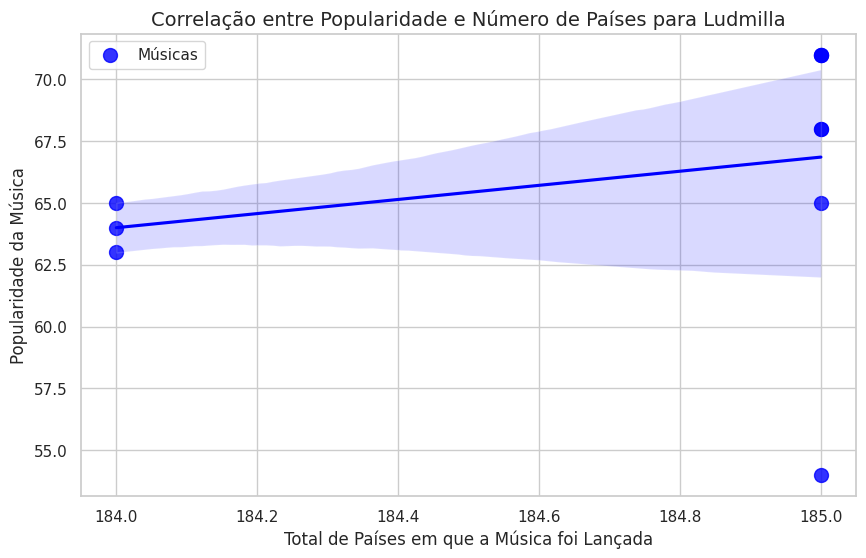

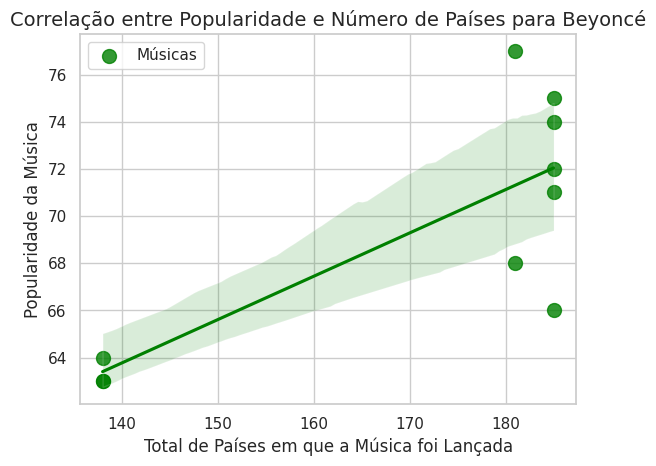

In [132]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Dados de exemplo: Popularidade das músicas e o número de países em que elas estão presentes
# Aqui você substituiria esses dados fictícios pelos reais que obteve da API.
data = {
    'artist': ['Ludmilla'] * 10 + ['Beyoncé'] * 10,
    'song': ['No_se_ve.mp3', 'Não Para', 'Maliciosa - Ao Vivo','Dia de Fluxo','Ainda Gosto de Você / Já Era - Ao Vivo','Falta de Mim - Ao Vivo','Numanice Lud Session - Modo Avião / A Tua Voz',
'A boba fui eu - Recorded At Mosh Studios, São','Você Não Sabe o Que é Amor - Ao Vivo','Poesia Acústica #10 Recomeçar',
             'Crazy In Love (feat. Jay-Z)','TEXAS HOLD EM','Halo','CUFF IT','Single Ladies (Put a Ring on It)','Irreplaceable','If I Were a Boy','Love On Top','Beautiful Liar','Haunted'],
    'release_year': [2023,2024,2024,2023,2023, 2024,2021,2020,2024,2024,2003,2024,2008,2022,2008,2006,2008,2011,2007,2014],
    'popularity': [71, 71, 63, 71, 68, 65, 68, 65, 64, 54, 77, 74, 64, 75, 63, 66, 63, 71, 68, 72],  # Popularidade das músicas
    'total_paises': [185, 185, 184, 185, 185, 184, 185, 185, 184, 185,  181, 185, 138, 185, 138, 185, 138, 185, 181, 185]  # Total de países onde as músicas foram lançadas
}

# Criando um DataFrame
df = pd.DataFrame(data)

# Separar por artista (opcional para análise comparativa)
df_ludmilla = df[df['artist'] == 'Ludmilla']
df_beyonce = df[df['artist'] == 'Beyoncé']

# Plotando o gráfico de dispersão com a linha de tendência (regressão linear)
plt.figure(figsize=(10, 6))

sns.regplot(x=df_ludmilla['total_paises'], y=df_ludmilla['popularity'], data=df, scatter_kws={'s': 100}, label='Total', color='blue')

# Configurações do gráfico
plt.title('Correlação entre Popularidade e Número de Países para Ludmilla', fontsize=14)
plt.xlabel('Total de Países em que a Música foi Lançada', fontsize=12)
plt.ylabel('Popularidade da Música', fontsize=12)
plt.legend(['Músicas'])
plt.grid(True)

# Exibir o gráfico
plt.show()


sns.regplot(x=df_beyonce['total_paises'], y=df_beyonce['popularity'], data=df, scatter_kws={'s': 100}, label='Total', color='green')

# Configurações do gráfico
plt.title('Correlação entre Popularidade e Número de Países para Beyoncé', fontsize=14)
plt.xlabel('Total de Países em que a Música foi Lançada', fontsize=12)
plt.ylabel('Popularidade da Música', fontsize=12)
plt.legend(['Músicas'])
plt.grid(True)

# Exibir o gráfico
plt.show()


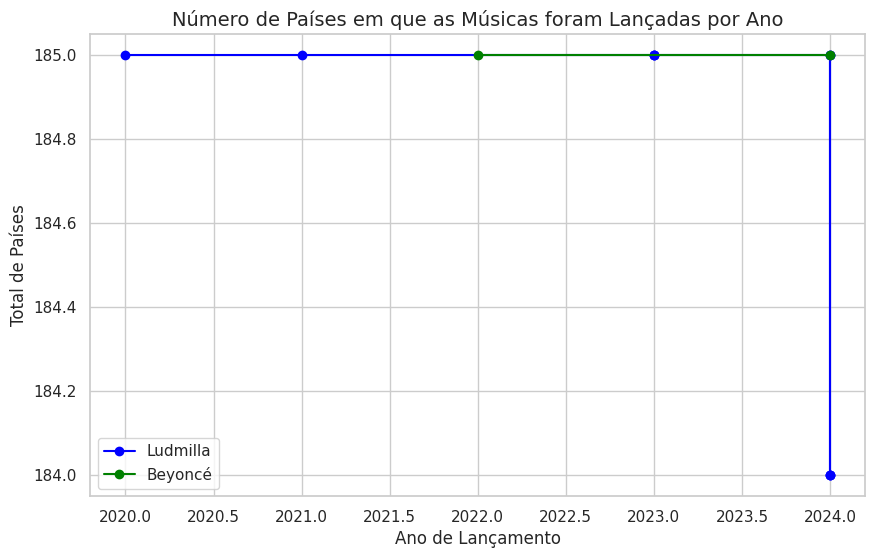

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (11,) and arg 1 with shape (10,).

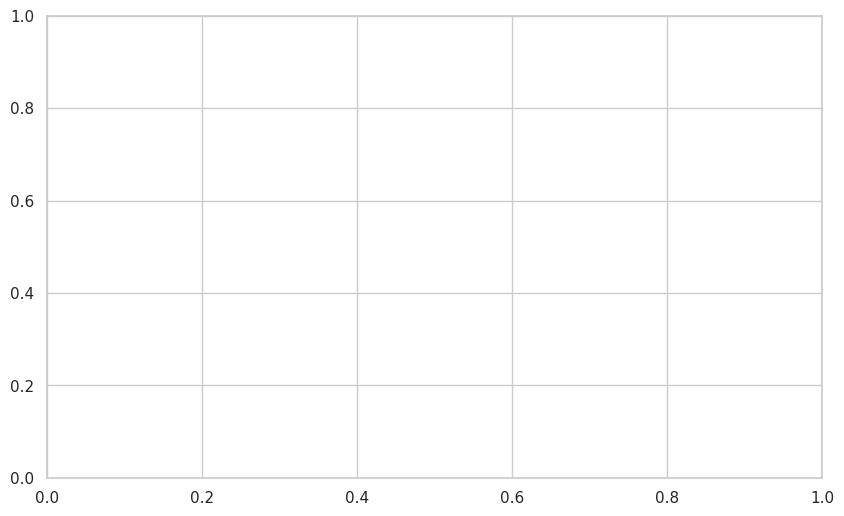

In [135]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Dados de exemplo: Popularidade das músicas e o número de países em que elas estão presentes
# Aqui você substituiria esses dados fictícios pelos reais que obteve da API.
data = {
    'artist': ['Ludmilla'] * 10 + ['Beyoncé'] * 10,
    'song': ['No_se_ve.mp3', 'Não Para', 'Maliciosa - Ao Vivo','Dia de Fluxo','Ainda Gosto de Você / Já Era - Ao Vivo','Falta de Mim - Ao Vivo','Numanice Lud Session - Modo Avião / A Tua Voz',
'A boba fui eu - Recorded At Mosh Studios, São','Você Não Sabe o Que é Amor - Ao Vivo','Poesia Acústica #10 Recomeçar',
             'Crazy In Love (feat. Jay-Z)','TEXAS HOLD EM','Halo','CUFF IT','Single Ladies (Put a Ring on It)','Irreplaceable','If I Were a Boy','Love On Top','Beautiful Liar','Haunted'],
    'release_year': [2023,2024,2024,2023,2023, 2024,2021,2020,2024,2024,2003,2024,2008,2022,2008,2006,2008,2011,2007,2014],
    'popularity': [71, 71, 63, 71, 68, 65, 68, 65, 64, 54, 77, 74, 64, 75, 63, 66, 63, 71, 68, 72],  # Popularidade das músicas
    'total_paises': [185, 185, 184, 185, 185, 184, 185, 185, 184, 185,  181, 185, 138, 185, 138, 185, 138, 185, 181, 185]  # Total de países onde as músicas foram lançadas
}

# Criando um DataFrame
df = pd.DataFrame(data)

# Separar por artista (opcional para análise comparativa)
df_ludmilla = df[df['artist'] == 'Ludmilla'].where(df['release_year']>=2020)
df_beyonce = df[df['artist'] == 'Beyoncé'].where(df['release_year']>=2020)
df_ludmilla.sort_values(by='release_year', inplace=True)
df_beyonce.sort_values(by='release_year', inplace=True)


# Plotar o gráfico de linhas
plt.figure(figsize=(10, 6))

# Gráfico de Ludmilla
plt.plot(df_ludmilla['release_year'], df_ludmilla['total_paises'], marker='o', label='Ludmilla', color='blue')

# Gráfico de Beyoncé
plt.plot(df_beyonce['release_year'], df_beyonce['total_paises'], marker='o', label='Beyoncé', color='green')

# Configurações do gráfico
plt.title('Número de Países em que as Músicas foram Lançadas por Ano', fontsize=14)
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Total de Países', fontsize=12)
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()



# Definir a largura das barras
bar_width = 0.35

# Definir a posição das barras no eixo x
years = np.unique(df['release_year'])
positions_ludmilla = np.arange(len(years))
positions_beyonce = positions_ludmilla + bar_width

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))

# Gráfico para Ludmilla
plt.bar(positions_ludmilla, df_ludmilla['total_paises'], bar_width, label='Ludmilla', color='blue')

# Gráfico para Beyoncé
plt.bar(positions_beyonce, df_beyonce['total_paises'], bar_width, label='Beyoncé', color='green')

# Adicionar rótulos e título
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Total de Países', fontsize=12)
plt.title('Total de Países em que as Músicas foram Lançadas por Ano', fontsize=14)

# Definir os rótulos do eixo x (anos) nas posições centrais das barras
plt.xticks(positions_ludmilla + bar_width / 2, years)

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (10,).

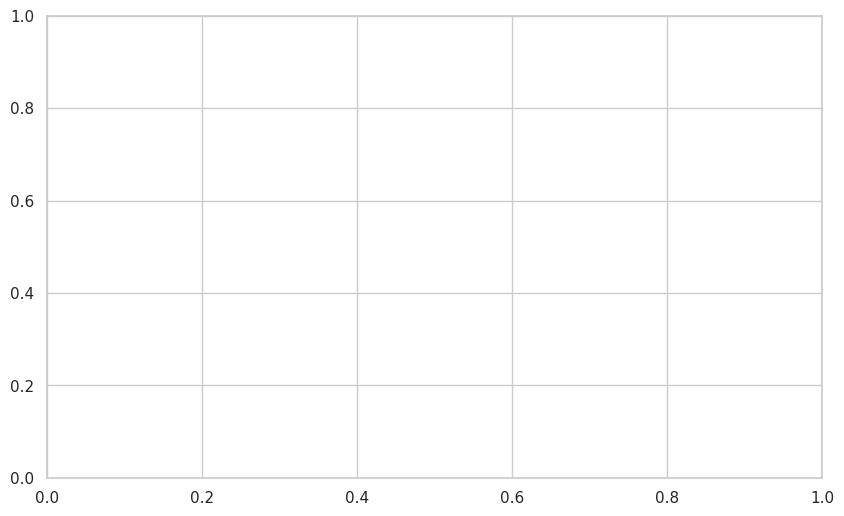

In [149]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Dados de exemplo: Popularidade das músicas e o número de países em que elas estão presentes
# Aqui você substituiria esses dados fictícios pelos reais que obteve da API.
data = {
    'artist': ['Ludmilla'] * 10 + ['Beyoncé'] * 10,
    'song': ['No_se_ve.mp3', 'Não Para', 'Maliciosa - Ao Vivo','Dia de Fluxo','Ainda Gosto de Você / Já Era - Ao Vivo','Falta de Mim - Ao Vivo','Numanice Lud Session - Modo Avião / A Tua Voz',
'A boba fui eu - Recorded At Mosh Studios, São','Você Não Sabe o Que é Amor - Ao Vivo','Poesia Acústica #10 Recomeçar',
             'Crazy In Love (feat. Jay-Z)','TEXAS HOLD EM','Halo','CUFF IT','Single Ladies (Put a Ring on It)','Irreplaceable','If I Were a Boy','Love On Top','Beautiful Liar','Haunted'],
    'release_year': [2023,2024,2024,2023,2023, 2024,2021,2020,2024,2024,2003,2024,2008,2022,2008,2006,2008,2011,2007,2014],
    'popularity': [71, 71, 63, 71, 68, 65, 68, 65, 64, 54, 77, 74, 64, 75, 63, 66, 63, 71, 68, 72],  # Popularidade das músicas
    'total_paises': [185, 185, 184, 185, 185, 184, 185, 185, 184, 185,  181, 185, 138, 185, 138, 185, 138, 185, 181, 185]  # Total de países onde as músicas foram lançadas
}

# Criando um DataFrame
df = pd.DataFrame(data)

df_ludmilla = df[df['artist'] == 'Ludmilla'].where(df['release_year']>=2020)
df_beyonce = df[df['artist'] == 'Beyoncé'].where(df['release_year']>=2020)
df_ludmilla.sort_values(by='release_year', inplace=True)
df_beyonce.sort_values(by='release_year', inplace=True)

# Definir a largura das barras
bar_width = 0.35


# Use unique release years for Ludmilla for positions, not all years
years_ludmilla = df_ludmilla['release_year'].unique()  # Unique years for Ludmilla
positions_ludmilla = np.arange(len(years_ludmilla))

# Similarly, use unique release years for Beyonce
years_beyonce = df_beyonce['release_year'].unique()  # Unique years for Beyonce
positions_beyonce = np.arange(len(years_beyonce))

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))

# Gráfico para Ludmilla
plt.bar(positions_ludmilla, df_ludmilla['total_paises'], bar_width, label='Ludmilla', color='blue')

# Gráfico para Beyoncé
plt.bar(positions_beyonce, df_beyonce['total_paises'], bar_width, label='Beyoncé', color='green')



# Adicionar rótulos e título
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Total de Países', fontsize=12)
plt.title('Total de Países em que as Músicas foram Lançadas por Ano', fontsize=14)

# Definir os rótulos do eixo x (anos) nas posições centrais das barras
plt.xticks(positions_ludmilla + bar_width / 2, years)

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [141]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Dados de exemplo: Popularidade das músicas e o número de países em que elas estão presentes
# Aqui você substituiria esses dados fictícios pelos reais que obteve da API.
data = {
    'artist': ['Ludmilla'] * 10 + ['Beyoncé'] * 10,
    'song': ['No_se_ve.mp3', 'Não Para', 'Maliciosa - Ao Vivo','Dia de Fluxo','Ainda Gosto de Você / Já Era - Ao Vivo','Falta de Mim - Ao Vivo','Numanice Lud Session - Modo Avião / A Tua Voz',
'A boba fui eu - Recorded At Mosh Studios, São','Você Não Sabe o Que é Amor - Ao Vivo','Poesia Acústica #10 Recomeçar',
             'Crazy In Love (feat. Jay-Z)','TEXAS HOLD EM','Halo','CUFF IT','Single Ladies (Put a Ring on It)','Irreplaceable','If I Were a Boy','Love On Top','Beautiful Liar','Haunted'],
    'release_year': [2023,2024,2024,2023,2023, 2024,2021,2020,2024,2024,2003,2024,2008,2022,2008,2006,2008,2011,2007,2014],
    'popularity': [71, 71, 63, 71, 68, 65, 68, 65, 64, 54, 77, 74, 64, 75, 63, 66, 63, 71, 68, 72],  # Popularidade das músicas
    'total_paises': [185, 185, 184, 185, 185, 184, 185, 185, 184, 185,  181, 185, 138, 185, 138, 185, 138, 185, 181, 185]  # Total de países onde as músicas foram lançadas
}

# Criando um DataFrame
df = pd.DataFrame(data)

df_ludmilla = df[df['artist'] == 'Ludmilla']
df_beyonce = df[df['artist'] == 'Beyoncé']
df_ludmilla.sort_values(by='release_year', inplace=True)
df_beyonce.sort_values(by='release_year', inplace=True)

# Definir a largura das barras
bar_width = 0.35

# Use unique release years for Ludmilla for positions, not all years
years_ludmilla = df_ludmilla['release_year'].unique()  # Unique years for Ludmilla
positions_ludmilla = np.arange(len(years_ludmilla))

# Similarly, use unique release years for Beyonce
years_beyonce = df_beyonce['release_year'].unique()  # Unique years for Beyonce
positions_beyonce = np.arange(len(years_beyonce))

<ipython-input-141-16e75e8e3f01>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ludmilla.sort_values(by='release_year', inplace=True)
<ipython-input-141-16e75e8e3f01>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beyonce.sort_values(by='release_year', inplace=True)
